In [4]:
%matplotlib inline
from tkinter import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import glob
import streamlit as st

from tkinter import *



First exploration - 
1) filter release_date to only the first 4 characters (year) store as year_released
2) filter year_released to popularity > 80
2) Find average danceability for each year ex: if release_date == 1990 > mean()
3) plot x = year y = avg danceability

In [5]:
path = r'C:\Users\dasan\Desktop\Repo\Project' #Read multiple CSV by pattern matching
all_files = glob.glob(path +"/*.csv")
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [6]:
len(df) #Length and types of data in CSV
df.dtypes


id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

In [7]:
# x= release date y = average----
df.release_date


0         1922-02-22
1         1922-06-01
2         1922-03-21
3         1922-03-21
4               1922
             ...    
586667    2020-09-26
586668    2020-10-21
586669    2020-09-02
586670    2021-03-05
586671    2015-07-01
Name: release_date, Length: 586672, dtype: object

In [8]:
#Year
df["Year Released"] = pd.to_datetime(df['release_date'])
df["Year Released"] = df["Year Released"].dt.year
df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Year Released
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,1922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,...,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,2020
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,...,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,2020
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,...,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,2020
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,...,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,2021


In [9]:
#Songs with popularity +80
df_popular = df[df['popularity'] >= 80]
df_popular.dtypes

id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
Year Released         int64
dtype: object

In [10]:
# average danceability for each year || sum(year) / num(year) > year + 1
df_popular.loc[df_popular ['Year Released'] == 2021]
#1967 first year with data for song 80+ popularity

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Year Released
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,...,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4,2021
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,...,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4,2021
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,...,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4,2021
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,...,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4,2021
93806,7Bk0uXKk1uPT0XuQbpFzvs,Fiel,94,261667,0,"['Los Legendarios', 'Wisin', 'Jhay Cortez']","['0n6sKrG0xKAf8xmdqeNGke', '3E6xrwgnVfYCrCs0eP...",2021-02-04,0.849,0.701,...,-4.407,0,0.0600,0.40700,0.000000,0.1120,0.505,98.005,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94033,3eZYOQO4UzKrUDYDghtnFw,test drive,80,122174,0,['Ariana Grande'],['66CXWjxzNUsdJxJ2JdwvnR'],2021-02-19,0.698,0.708,...,-4.943,0,0.0454,0.02510,0.000000,0.1240,0.322,115.036,4,2021
115733,2etHQJxIbV0soyPhelVs9Y,Best Friend (feat. Doja Cat),90,155884,1,"['Saweetie', 'Doja Cat']","['6cK3NBO6uP7hh0oyuVELFl', '5cj0lLjcoR7YOSnhnX...",2021-01-07,0.840,0.766,...,-4.120,1,0.1360,0.00302,0.000004,0.0684,0.402,94.018,4,2021
119457,2xgACMNtJ5YktyvOC83SPO,On The Ground,86,168086,0,['ROSÉ'],['3eVa5w3URK5duf6eyVDbu9'],2021-03-12,0.311,0.607,...,-6.578,1,0.1100,0.01740,0.000000,0.1310,0.286,188.700,4,2021
119458,2ayIgfvWo3SfYP2pVOr4pC,Gone,83,207164,0,['ROSÉ'],['3eVa5w3URK5duf6eyVDbu9'],2021-03-12,0.647,0.377,...,-6.003,1,0.0375,0.59400,0.000000,0.0768,0.653,79.936,4,2021


In [11]:
# Avg danceability each year
dance_year = df_popular['danceability'].groupby(df_popular['Year Released'])
print(dance_year.mean())

Year Released
1965    0.572000
1967    0.577000
1969    0.598500
1970    0.554000
1971    0.414000
1972    0.601000
1974    0.596000
1975    0.414000
1976    0.499667
1977    0.653400
1978    0.663000
1979    0.671000
1980    0.591667
1981    0.500000
1982    0.756800
1983    0.672000
1984    0.566667
1985    0.673333
1986    0.536500
1987    0.566750
1990    0.502000
1991    0.525167
1992    0.565000
1993    0.515000
1994    0.374500
1995    0.647000
1996    0.784500
1997    0.356000
1999    0.680571
2000    0.675500
2001    0.541200
2002    0.665667
2003    0.590714
2004    0.572000
2005    0.634222
2006    0.666250
2007    0.673000
2008    0.661273
2009    0.618800
2010    0.660867
2011    0.652100
2012    0.630412
2013    0.531278
2014    0.627296
2015    0.606875
2016    0.616914
2017    0.655037
2018    0.674697
2019    0.679372
2020    0.716743
2021    0.689352
Name: danceability, dtype: float64


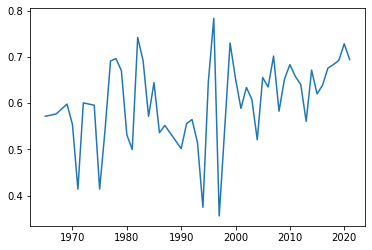

In [12]:
plt.plot(dance_year.median())

Next to do: User input chooses the plot with dropdown from tkinter 
            Exclude mode and key

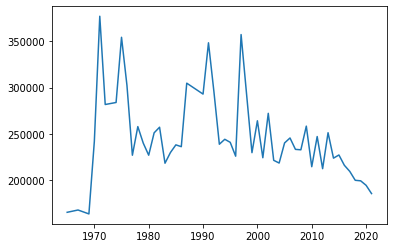

In [13]:
root = Tk()

root.geometry("200x200")
def show():
    label.config(text=clicked.get())

options = ["duration_ms","explicit","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo","time_signature"]  

clicked = StringVar(root)
clicked.set(options[0])

drop = OptionMenu(root, clicked, *options)
drop.pack()

button = Button(root, text = "Click", command = show).pack()

label = Label(root, text = " ")
label.pack()

root.mainloop()

plot = df_popular[clicked.get()].groupby(df_popular['Year Released'])
plt.plot(plot.mean())


Need to add correlation/regression? look into stats
Also add labels
Note - median may be more useful than mean // could let user choose median or mean

In [14]:
r = np.corrcoef(df_popular['Year Released'], df_popular['danceability'])
r

array([[1.        , 0.19587456],
       [0.19587456, 1.        ]])

In [15]:
df_popular.corr()
#Correlation analysis, numbers close to +/- 1 are strongest corr


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Year Released
popularity,1.000000,-0.111639,0.053036,0.066230,-0.064217,-0.010893,-0.022068,-0.019428,0.021920,0.068088,0.011512,0.017114,-0.012481,-0.026633,-0.022650,0.186430
duration_ms,-0.111639,1.000000,-0.099038,-0.204914,0.025430,-0.010765,-0.062680,0.105380,-0.133387,-0.055940,0.007985,0.006624,-0.043765,-0.000169,0.006311,-0.373750
explicit,0.053036,-0.099038,1.000000,0.295812,-0.103383,-0.004681,-0.047317,-0.094389,0.366689,-0.095812,-0.063089,0.026305,-0.082894,0.062020,0.056583,0.220149
danceability,0.066230,-0.204914,0.295812,1.000000,0.057289,0.041932,0.162214,-0.147060,0.269486,-0.169931,-0.113647,-0.097415,0.377844,-0.086459,0.170400,0.195875
energy,-0.064217,0.025430,-0.103383,0.057289,1.000000,-0.000204,0.694491,-0.056962,-0.009082,-0.551486,-0.130680,0.140808,0.448041,0.146187,0.182986,-0.117166
key,-0.010893,-0.010765,-0.004681,0.041932,-0.000204,1.000000,0.010023,-0.114796,0.040117,-0.019266,0.018846,0.018216,0.026684,-0.025940,-0.010561,0.049862
loudness,-0.022068,-0.062680,-0.047317,0.162214,0.694491,0.010023,1.000000,-0.052011,-0.004762,-0.367263,-0.299126,0.050627,0.340824,0.137416,0.224383,0.150641
mode,-0.019428,0.105380,-0.094389,-0.147060,-0.056962,-0.114796,-0.052011,1.000000,-0.092617,0.098032,0.009407,0.074382,-0.015616,0.004056,-0.040273,-0.110273
speechiness,0.021920,-0.133387,0.366689,0.269486,-0.009082,0.040117,-0.004762,-0.092617,1.000000,-0.052978,-0.013416,-0.024369,0.041174,0.118516,0.077905,0.167713
acousticness,0.068088,-0.055940,-0.095812,-0.169931,-0.551486,-0.019266,-0.367263,0.098032,-0.052978,1.000000,0.085062,-0.042158,-0.189817,-0.092207,-0.142626,0.104751


Notes for what to explore:
Find any relationship/intersection between any column against time and popularity against time
Look into those with interesting Correlations: unstack and sort for those above .3 in either direction, remove duplicates

To do next with that data: data viz

In [16]:
c = df_popular.corr()

s = c.unstack() #unstack to sort by value
so = s.sort_values(kind="quicksort")
so1 = so[0:8]
result1 = {} # remove duplicates
for key,value in so1.items():
    if value not in result1.values():
        result1[key] = value
result1

{('acousticness', 'energy'): -0.5514855541066971,
 ('duration_ms', 'Year Released'): -0.3737499334290756,
 ('loudness', 'acousticness'): -0.3672629443123543,
 ('loudness', 'instrumentalness'): -0.2991262791539886}

In [17]:
so2 = so[228:240]

result2 = {}
for key,value in so2.items():
    if value not in result2.values():
        result2[key] = value
result1.update(result2)

Correlation for popularity
Note duration only thing correlated to year released

<AxesSubplot:>

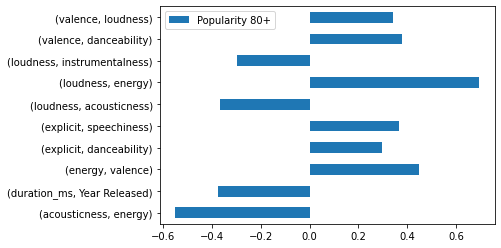

In [18]:
p = {**result1}
p_ = {'Popularity 80+' : result1}
dfp = pd.DataFrame(data=p_) 
dfp.plot.barh()

Check if key or mode change correlation

In [19]:
#dataframe popular - filter by mode 0/1
df_mode_1 = df_popular[df_popular['mode'] == 1]
df_mode_0 = df_popular[df_popular['mode'] == 0]
df_mode_0

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Year Released
48488,4u7EnebtmKWzUH433cf5Qv,Bohemian Rhapsody - Remastered 2011,83,354320,0,['Queen'],['1dfeR4HaWDbWqFHLkxsg1d'],1975-11-21,0.414,0.404,...,-9.928,0,0.0499,0.2710,0.000000,0.3000,0.224,71.105,4,1975
52488,2zYzyRzz6pRmhPzyfMEC8s,Highway to Hell,84,208400,0,['AC/DC'],['711MCceyCBcFnzjGY4Q7Un'],1979-07-27,0.574,0.913,...,-4.793,0,0.1330,0.0610,0.001580,0.1560,0.423,115.728,4,1979
53489,5vdp5UmvTsnMEMESIF2Ym7,Another One Bites The Dust - Remastered 2011,83,214653,0,['Queen'],['1dfeR4HaWDbWqFHLkxsg1d'],1980-06-27,0.933,0.528,...,-6.472,0,0.1610,0.1120,0.312000,0.1630,0.754,109.967,4,1980
55488,5ChkMS8OtdzJeqyybCc9R5,Billie Jean,85,293827,0,['Michael Jackson'],['3fMbdgg4jU18AjLCKBhRSm'],1982-11-30,0.920,0.654,...,-3.051,0,0.0401,0.0236,0.015800,0.0359,0.847,117.046,4,1982
55491,1OOtq8tRnDM8kG2gqUPjAj,Beat It,80,258040,0,['Michael Jackson'],['3fMbdgg4jU18AjLCKBhRSm'],1982-11-30,0.779,0.867,...,-3.704,0,0.0457,0.0491,0.000008,0.1970,0.915,138.858,4,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112898,0TDLuuLlV54CkRRUOahJb4,Titanium (feat. Sia),80,245040,0,"['David Guetta', 'Sia']","['1Cs0zKBU1kc0i8ypK3B9ai', '5WUlDfRSoLAfcVSX1W...",2012-12-07,0.604,0.787,...,-3.674,0,0.1030,0.0679,0.150000,0.1270,0.301,126.062,4,2012
114192,06KyNuuMOX1ROXRhj787tj,We Don't Talk Anymore (feat. Selena Gomez),80,217707,0,"['Charlie Puth', 'Selena Gomez']","['6VuMaDnrHyPL1p4EHjYLi7', '0C8ZW7ezQVs4URX5aX...",2016-01-29,0.728,0.563,...,-8.053,0,0.1340,0.6210,0.000000,0.1790,0.352,100.017,4,2016
115090,26wLOs3ZuHJa2Ihhx6QIE6,Teeth,80,204887,0,['5 Seconds of Summer'],['5Rl15oVamLq7FbSb0NNBNy'],2019-08-23,0.749,0.461,...,-2.961,0,0.0416,0.0516,0.000006,0.0738,0.420,139.020,4,2019
156197,161DnLWsx1i3u1JT05lzqU,Talking to the Moon,83,217867,0,['Bruno Mars'],['0du5cEVh5yTK9QJze8zA0C'],2010-10-05,0.523,0.606,...,-4.754,0,0.0301,0.5120,0.000000,0.1060,0.065,145.837,4,2010


In [20]:
#mode = 1 correlations -
cm1 = df_mode_1.corr()
cm1 = cm1.drop('mode')
cm1 = cm1.drop('mode', axis = 1) #remove nan

sm1 = cm1.unstack() #unstack to sort by value
som1 = sm1.sort_values(kind="quicksort")
som1 = som1[:]
resultm1 = {} # remove duplicates
for key,value in som1.items():
    if value not in resultm1.values():
        resultm1[key] = value
res = {key : val for key, val in resultm1.items()
                   if type(val) != int and val < -.30}
res


{('energy', 'acousticness'): -0.5989240744230387,
 ('time_signature', 'instrumentalness'): -0.3988541850619762,
 ('loudness', 'acousticness'): -0.3748462960644168,
 ('duration_ms', 'Year Released'): -0.3412253828549607,
 ('instrumentalness', 'loudness'): -0.3377386241794062}

In [21]:
#mode = 1 correlations +
sm1_ = cm1.unstack() #unstack to sort by value
som1_ = sm1_.sort_values(kind="quicksort")
som1_ = som1_[:]
resultm1_ = {} # remove duplicates
for key,value in som1_.items():
    if value not in resultm1_.values():
        resultm1_[key] = value
res_ = {key : val for key, val in resultm1_.items()
                   if type(val) != int and val > .30 and val != 1}
res.update(res_)
res

{('energy', 'acousticness'): -0.5989240744230387,
 ('time_signature', 'instrumentalness'): -0.3988541850619762,
 ('loudness', 'acousticness'): -0.3748462960644168,
 ('duration_ms', 'Year Released'): -0.3412253828549607,
 ('instrumentalness', 'loudness'): -0.3377386241794062,
 ('valence', 'loudness'): 0.34251089797665984,
 ('danceability', 'valence'): 0.361656519959746,
 ('speechiness', 'explicit'): 0.37759384556573417,
 ('valence', 'energy'): 0.4452559123066824,
 ('energy', 'loudness'): 0.694245422864013}

In [22]:
#mode = 0 correlations - 
cm0 = df_mode_0.corr()
cm0 = cm0.drop('mode')
cm0 = cm0.drop('mode', axis = 1) #remove nan

sm0 = cm0.unstack() #unstack to sort by value
som0 = sm0.sort_values(kind="quicksort")
som0 = som0[:]
resultm0 = {} # remove duplicates
for key,value in som0.items():
    if value not in resultm0.values():
        resultm0[key] = value
res0 = {key : val for key, val in resultm0.items()
                   if type(val) != int and val < -.30}
res0

{('energy', 'acousticness'): -0.45180957283487805,
 ('duration_ms', 'Year Released'): -0.4424409087514309,
 ('loudness', 'acousticness'): -0.3431927273373411}

In [23]:
#mode = 0 correlations +
cm0_ = df_mode_0.corr()
cm0_ = cm0_.drop('mode')
cm0_ = cm0_.drop('mode', axis = 1) #remove nan

sm0_ = cm0_.unstack() #unstack to sort by value
som0_ = sm0_.sort_values(kind="quicksort")
som0_ = som0_[:]
resultm0_ = {} # remove duplicates
for key,value in som0_.items():
    if value not in resultm0_.values():
        resultm0_[key] = value
res0_ = {key : val for key, val in resultm0_.items()
                   if type(val) != int and val > .30 and val != 1.0}
res0.update(res0_)
res0


{('energy', 'acousticness'): -0.45180957283487805,
 ('duration_ms', 'Year Released'): -0.4424409087514309,
 ('loudness', 'acousticness'): -0.3431927273373411,
 ('speechiness', 'explicit'): 0.3401987679335879,
 ('valence', 'loudness'): 0.3414735138081908,
 ('valence', 'danceability'): 0.40929330986870127,
 ('valence', 'energy'): 0.45632872293954274,
 ('energy', 'loudness'): 0.69251820966665}

<AxesSubplot:>

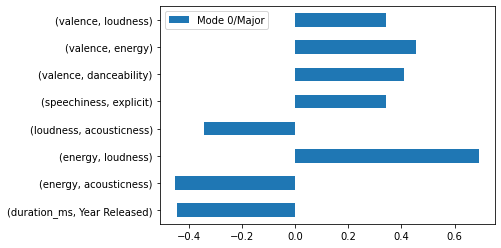

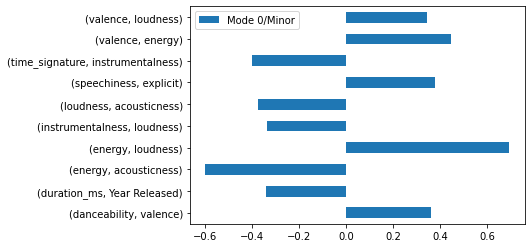

In [24]:
m0_ = {**res0}
m0_ = {'Mode 0/Minor' : res0}
dfm0 = pd.DataFrame(data=m0_) 
m1_ = {**res}
m1_ = {'Mode 0/Major' : res}
dfm1 = pd.DataFrame(data=m1_) 

dfm0.plot.barh()
dfm1.plot.barh()

Correlations for all keys

In [25]:
#d = {}
#for i in range(0,12):
    #d["df_key{0}".format(x)] = df_popular[df_popular['key'] == i]
df_key0 = df_popular[df_popular['key'] == 0]
df_key1 = df_popular[df_popular['key'] == 1]
df_key2 = df_popular[df_popular['key'] == 2]
df_key3 = df_popular[df_popular['key'] == 3]
df_key4 = df_popular[df_popular['key'] == 4]
df_key5 = df_popular[df_popular['key'] == 5]
df_key6 = df_popular[df_popular['key'] == 6]
df_key7 = df_popular[df_popular['key'] == 7]
df_key8 = df_popular[df_popular['key'] == 8]
df_key9 = df_popular[df_popular['key'] == 9]
df_key10 = df_popular[df_popular['key'] == 10]
df_key11 = df_popular[df_popular['key'] == 11]


#Need to automate this process to go through range(0,12)

In [26]:
#Correlations for key 0
k0 = df_key0.corr()
k0 = k0.drop('key')
k0 = k0.drop('key', axis = 1) #remove nan

uk0 = k0.unstack() #unstack to sort by value
suk0 = uk0.sort_values(kind="quicksort")
suk0 = suk0[:]
resultk0 = {} # remove duplicates
for key,value in suk0.items():
    if value not in resultk0.values():
        resultk0[key] = value
resk0 = {key : val for key, val in resultk0.items()
                   if type(val) != int and val < -.30}
reskk0_ = {key : val for key, val in resultk0.items()
                   if type(val) != int and val > .30 and val != 1.0}
resk0.update(reskk0_)


#Correlations for key 1
k1 = df_key1.corr()
k1 = k1.drop('key')
k1 = k1.drop('key', axis = 1) #remove nan

uk1 = k1.unstack() #unstack to sort by value
suk1 = uk1.sort_values(kind="quicksort")
suk1 = suk1[:]
resultk1 = {} # remove duplicates
for key,value in suk1.items():
    if value not in resultk1.values():
        resultk1[key] = value
resk1 = {key : val for key, val in resultk1.items()
                   if type(val) != int and val < -.30}
reskk1_ = {key : val for key, val in resultk1.items()
                   if type(val) != int and val > .30 and val != 1.0}
resk1.update(reskk1_)


#Correlations for key 2
k2 = df_key2.corr()
k2 = k2.drop('key')
k2 = k2.drop('key', axis = 1) #remove nan

uk2 = k2.unstack() #unstack to sort by value
suk2 = uk2.sort_values(kind="quicksort")
suk2 = suk2[:]
resultk2 = {} # remove duplicates
for key,value in suk2.items():
    if value not in resultk2.values():
        resultk2[key] = value
resk2 = {key : val for key, val in resultk2.items()
                   if type(val) != int and val < -.30}
reskk2_ = {key : val for key, val in resultk2.items()
                   if type(val) != int and val > .30 and val != 1.0}
resk2.update(reskk2_)

#Correlations for key 3
k3 = df_key3.corr()
k3 = k3.drop('key')
k3 = k3.drop('key', axis = 1) #remove nan

uk3 = k3.unstack() #unstack to sort by value
suk3 = uk3.sort_values(kind="quicksort")
suk3 = suk3[:]
resultk3 = {} # remove duplicates
for key,value in suk3.items():
    if value not in resultk3.values():
        resultk3[key] = value
resk3 = {key : val for key, val in resultk3.items()
                   if type(val) != int and val < -.30}
reskk3_ = {key : val for key, val in resultk3.items()
                   if type(val) != int and val > .30 and val != 1.0}
resk3.update(reskk3_)


#Correlations for key 4
k4 = df_key4.corr()
k4 = k4.drop('key')
k4 = k4.drop('key', axis = 1) #remove nan

uk4 = k4.unstack() #unstack to sort by value
suk4 = uk4.sort_values(kind="quicksort")
suk4 = suk4[:]
resultk4 = {} # remove duplicates
for key,value in suk4.items():
    if value not in resultk4.values():
        resultk4[key] = value
resk4 = {key : val for key, val in resultk4.items()
                   if type(val) != int and val < -.30}
reskk4_ = {key : val for key, val in resultk4.items()
                   if type(val) != int and val > .30 and val != 1.0}
resk4.update(reskk4_)


#Correlations for key 5
k5 = df_key5.corr()
k5 = k5.drop('key')
k5 = k5.drop('key', axis = 1) #remove nan

uk5 = k5.unstack() #unstack to sort by value
suk5 = uk5.sort_values(kind="quicksort")
suk5 = suk5[:]
resultk5 = {} # remove duplicates
for key,value in suk5.items():
    if value not in resultk5.values():
        resultk5[key] = value
resk5 = {key : val for key, val in resultk5.items()
                   if type(val) != int and val < -.30}
reskk5_ = {key : val for key, val in resultk5.items()
                   if type(val) != int and val > .30 and val != 1.0}
resk5.update(reskk5_)


#Correlations for key 6
k6 = df_key6.corr()
k6 = k6.drop('key')
k6 = k6.drop('key', axis = 1) #remove nan

uk6 = k6.unstack() #unstack to sort by value
suk6 = uk6.sort_values(kind="quicksort")
suk6 = suk6[:]
resultk6 = {} # remove duplicates
for key,value in suk6.items():
    if value not in resultk6.values():
        resultk6[key] = value
resk6 = {key : val for key, val in resultk6.items()
                   if type(val) != int and val < -.30}
reskk6_ = {key : val for key, val in resultk6.items()
                   if type(val) != int and val > .30 and val != 1.0}
resk6.update(reskk6_)

#Correlations for key 7
k7 = df_key7.corr()
k7 = k7.drop('key')
k7 = k7.drop('key', axis = 1) #remove nan

uk7 = k7.unstack() #unstack to sort by value
suk7 = uk7.sort_values(kind="quicksort")
suk7 = suk7[:]
resultk7 = {} # remove duplicates
for key,value in suk3.items():
    if value not in resultk7.values():
        resultk7[key] = value
resk7 = {key : val for key, val in resultk7.items()
                   if type(val) != int and val < -.30}
reskk7_ = {key : val for key, val in resultk7.items()
                   if type(val) != int and val > .30 and val != 1.0}
resk7.update(reskk7_)

#Correlations for key 8
k8 = df_key8.corr()
k8 = k8.drop('key')
k8 = k8.drop('key', axis = 1) #remove nan

uk8 = k8.unstack() #unstack to sort by value
suk8 = uk8.sort_values(kind="quicksort")
suk8 = suk8[:]
resultk8 = {} # remove duplicates
for key,value in suk8.items():
    if value not in resultk8.values():
        resultk8[key] = value
resk8 = {key : val for key, val in resultk8.items()
                   if type(val) != int and val < -.30}
reskk8_ = {key : val for key, val in resultk8.items()
                   if type(val) != int and val > .30 and val != 1.0}
resk8.update(reskk8_)

#Correlations for key 9
k9 = df_key9.corr()
k9 = k9.drop('key')
k9 = k9.drop('key', axis = 1) #remove nan

uk9 = k9.unstack() #unstack to sort by value
suk9 = uk9.sort_values(kind="quicksort")
suk9 = suk9[:]
resultk9 = {} # remove duplicates
for key,value in suk9.items():
    if value not in resultk9.values():
        resultk9[key] = value
resk9 = {key : val for key, val in resultk9.items()
                   if type(val) != int and val < -.30}
reskk9_ = {key : val for key, val in resultk9.items()
                   if type(val) != int and val > .30 and val != 1.0}
resk9.update(reskk9_)

#Correlations for key 10
k10 = df_key10.corr()
k10 = k10.drop('key')
k10 = k10.drop('key', axis = 1) #remove nan

uk10 = k10.unstack() #unstack to sort by value
suk10 = uk10.sort_values(kind="quicksort")
suk10 = suk10[:]
resultk10 = {} # remove duplicates
for key,value in suk10.items():
    if value not in resultk10.values():
        resultk10[key] = value
resk10 = {key : val for key, val in resultk10.items()
                   if type(val) != int and val < -.30}
reskk10_ = {key : val for key, val in resultk10.items()
                   if type(val) != int and val > .30 and val != 1.0}
resk10.update(reskk10_)

#Correlations for key 11
k11 = df_key11.corr()
k11 = k11.drop('key')
k11 = k11.drop('key', axis = 1) #remove nan

uk11 = k11.unstack() #unstack to sort by value
suk11 = uk11.sort_values(kind="quicksort")
suk11 = suk11[:]
resultk11 = {} # remove duplicates
for key,value in suk11.items():
    if value not in resultk11.values():
        resultk11[key] = value
resk11 = {key : val for key, val in resultk11.items()
                   if type(val) != int and val < -.30}
reskk11_ = {key : val for key, val in resultk11.items()
                   if type(val) != int and val > .30 and val != 1.0}
resk11.update(reskk11_)




In [27]:
#dataframe for k0 = dfk0
k0_ = {**resk0}
k0_ = {'key0/C' : resk0}
dfk0 = pd.DataFrame(data=k0_) 

k1_ = {**resk1}
k1_ = {'key1/C#' : resk1}
dfk1 = pd.DataFrame(data=k1_) 

k2_ = {**resk0}
k2_ = {'key2/D' : resk2}
dfk2 = pd.DataFrame(data=k2_) 

k3_ = {**resk3}
k3_ = {'key3/D#' : resk3}
dfk3 = pd.DataFrame(data=k3_) 


k4_ = {**resk4}
k4_ = {'key4/E' : resk4}
dfk4 = pd.DataFrame(data=k4_) 


k5_ = {**resk5}
k5_ = {'key5/F' : resk5}
dfk5 = pd.DataFrame(data=k5_) 


k6_ = {**resk6}
k6_ = {'key6/F#' : resk6}
dfk6 = pd.DataFrame(data=k6_) 


k7_ = {**resk7}
k7_ = {'key7/G' : resk7}
dfk7 = pd.DataFrame(data=k7_) 


k8_ = {**resk8}
k8_ = {'key8/G#' : resk8}
dfk8 = pd.DataFrame(data=k8_) 

k9_ = {**resk9}
k9_ = {'key9/A' : resk9}
dfk9 = pd.DataFrame(data=k9_) 


k10_ = {**resk10}
k10_ = {'key10/A#' : resk10}
dfk10 = pd.DataFrame(data=k10_) 

k11_ = {**resk11}
k11_ = {'key11/B' : resk11}
dfk11 = pd.DataFrame(data=k11_) 

In [28]:
dfk0

key0/C
Year Released duration_ms  -0.320011
danceability  explicit      0.376876
              valence       0.374967
energy        acousticness -0.553293
              valence       0.442872
loudness      acousticness -0.460776
              energy        0.787064

Find way to display key data
Note: maybe drop down to select key and will show the corr data


<AxesSubplot:>

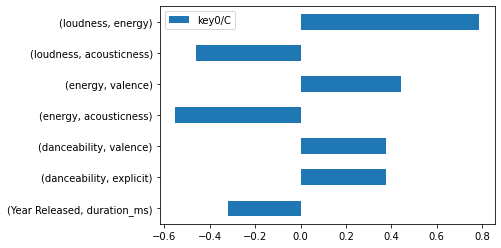

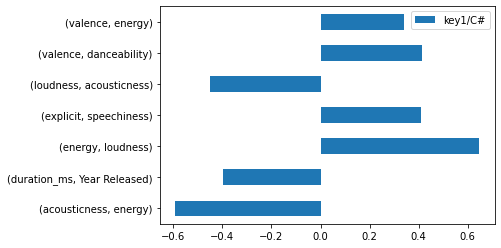

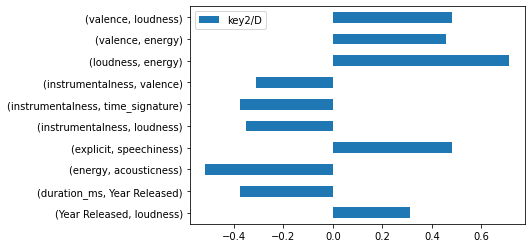

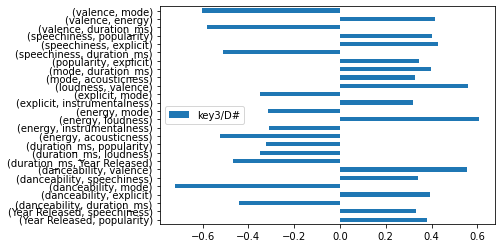

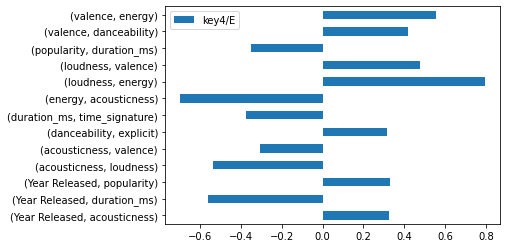

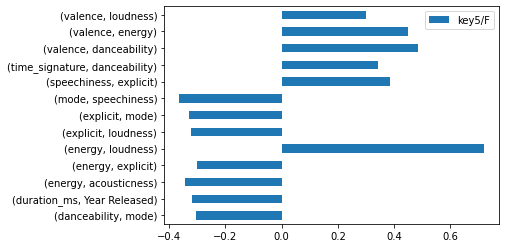

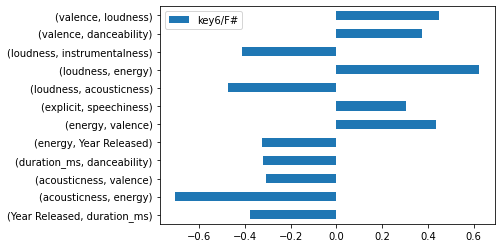

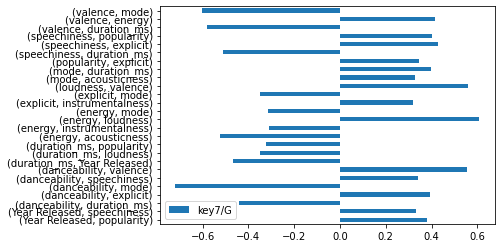

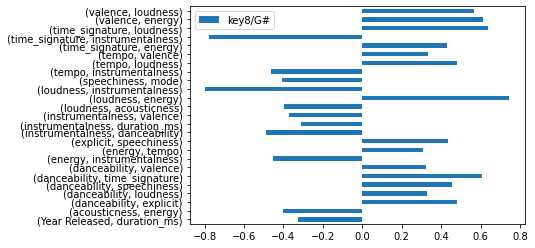

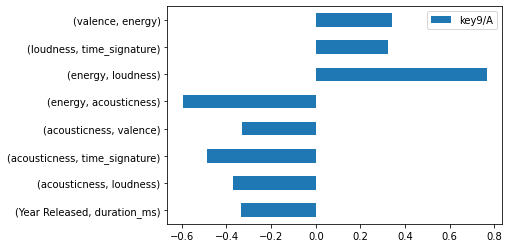

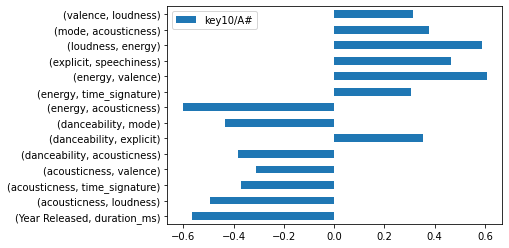

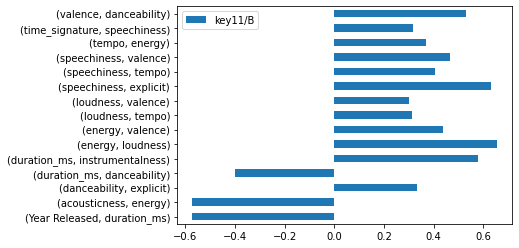

In [29]:
dfk0.plot.barh()
dfk1.plot.barh()
dfk2.plot.barh()
dfk3.plot.barh()
dfk4.plot.barh()
dfk5.plot.barh()
dfk6.plot.barh()
dfk7.plot.barh()
dfk8.plot.barh()
dfk9.plot.barh()
dfk10.plot.barh()
dfk11.plot.barh()

Notes on Correlations
------------------------
There are many correlations for key, maybe filter down to large .5+

Mode has few correlationss keep at low .3+

So Far Done
-----------------------
1) Graph creation for variable over time
    // need to add correlation lines

2) Graph for popularity

3) Graph for Mode

4) Graph for Key

//////
Need to figure out what to do with correlation data, How to display


If find out how to loop through creating new dataframes maybe do filter by mode and key at same time

Graphs for every year

Pop 80+ Corre .3 // valence,loudness | valence,danceability | loudness,instrumentalness | loudness,energy | loudness,acousticness |
explicit, speechiness | explicit, danceability | energy, valence |
duration_ms, Year Released | acousticness,energy

Only Year Released correlation is duration_ms

<AxesSubplot:>

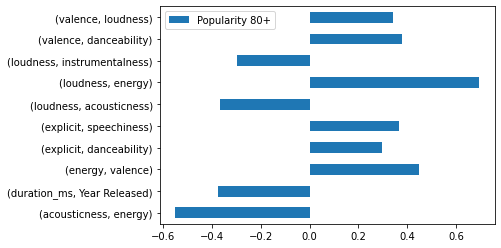

In [30]:
dfp.plot.barh()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\dasan\AppData\Local\Programs\Python\Python39\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "<ipython-input-31-15e572e94d7e>", line 10, in show
    label.config(text=clicked.get())
  File "C:\Users\dasan\AppData\Local\Programs\Python\Python39\lib\tkinter\__init__.py", line 1646, in configure
    return self._configure('configure', cnf, kw)
  File "C:\Users\dasan\AppData\Local\Programs\Python\Python39\lib\tkinter\__init__.py", line 1636, in _configure
    self.tk.call(_flatten((self._w, cmd)) + self._options(cnf))
_tkinter.TclError: invalid command name ".!label"


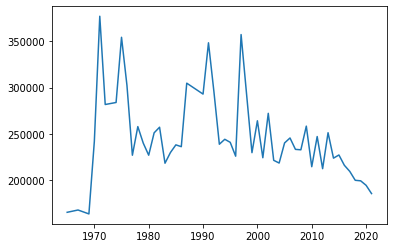

In [31]:
#Try to make user input of X and Y where X filters Y options to those that correlate
#Do for popular songs all modes/keys first then figure out filters 

dfc = df_popular.corr()

root1 = Tk()

root1.geometry("200x200")
def show():
    label.config(text=clicked.get())

optionsx = ["duration_ms","explicit","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo","time_signature"]  
optionsy=[]

clickedx = StringVar(root1)
clickedx.set(optionsx[0])


drop1 = OptionMenu(root1, clickedx, *options)
drop1.pack()

button1 = Button(root1, text = "Click", command = show).pack()

label1 = Label(root1, text = " ")
label1.pack()

root1.mainloop()
plot = df_popular[clicked.get()].groupby(df_popular['Year Released'])
plt.plot(plot.mean())



<AxesSubplot:xlabel='Year Released', ylabel='duration_ms'>

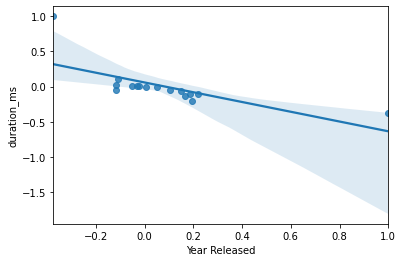

In [32]:
dfc = df_popular.corr()
#ax = sns.regplot(x="energy", y="loudness", data=dfc)
sns.regplot(x=dfc['Year Released'],y=dfc['duration_ms'])

Panels GUI // Panel really hard to get working
Try streamlit -- create CSVs for dataframes for streamlit user manipulation ++ code ordinal features
Find out how to write CSVs from DF